### Week 2 Data Exploration

In [1]:
# This code appears in every demonstration Notebook.
# By default, when you run each cell, only the last output of the codes will show.
# This code makes all outputs of a cell show.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

We will explore the user and order data from JD.com.

1. We import the necessary packages.

In [2]:
import pandas as pd

2. We read in the datasets.

In [3]:
users = pd.read_csv('JD_user_data.csv')
orders = pd.read_csv('JD_order_data.csv')
# users and orders are now dataframes of Pandas

In [6]:
type(users)

pandas.core.frame.DataFrame

3. Take a look at the data

In [5]:
users.head(10)
orders.head()
# The head() displays a sample of the dataset
# The number argument specifies the number of rows to show

,user_ID,user_level,first_order_month,plus,gender,age,marital_status,education,city_level,purchase_power
0,000089d6a6,1,2017-08,0,F,26-35,S,3,4,3
1,0000babd1f,1,2018-03,0,U,U,U,-1,-1,-1
2,0000bc018b,3,2016-06,0,F,>=56,M,3,2,3
3,0000d0e5ab,3,2014-06,0,M,26-35,M,3,2,2
4,0000dce472,3,2012-08,1,U,U,U,-1,-1,-1
5,0000f81d1b,1,2018-02,0,F,26-35,M,2,3,2
6,00012bb423,4,2008-11,1,F,26-35,M,4,1,2
7,00015ff032,3,2015-06,1,M,26-35,M,3,4,1
8,0001aa7059,4,2014-06,0,F,36-45,M,3,4,2
9,0001bbdc89,2,2017-12,0,F,16-25,S,3,2,2


,order_ID,user_ID,sku_ID,order_date,order_time,quantity,type,promise,original_unit_price,final_unit_price,direct_discount_per_unit,quantity_discount_per_unit,bundle_discount_per_unit,coupon_discount_per_unit,gift_item,dc_ori,dc_des
0,d0cf5cc6db,0abe9ef2ce,581d5b54c1,2018-03-01,2018-03-01 17:14:25.0,1,2,-,89.0,79.0,0.0,10.0,0.0,0.0,0,4,28
1,7444318d01,33a9e56257,067b673f2b,2018-03-01,2018-03-01 11:10:40.0,1,1,2,99.9,53.9,5.0,41.0,0.0,0.0,0,28,28
2,f973b01694,4ea3cf408f,623d0a582a,2018-03-01,2018-03-01 09:13:26.0,1,1,2,78.0,58.5,19.5,0.0,0.0,0.0,0,28,28
3,8c1cec8d4b,b87cb736cb,fc5289b139,2018-03-01,2018-03-01 21:29:50.0,1,1,2,61.0,35.0,0.0,26.0,0.0,0.0,0,4,28
4,d43a33c38a,4829223b6f,623d0a582a,2018-03-01,2018-03-01 19:13:37.0,1,1,1,78.0,53.0,19.0,0.0,0.0,6.0,0,3,16


4. Explore a single categorical variable

In [7]:
users.columns
# Displays the variables of the dataframe

Index(['user_ID', 'user_level', 'first_order_month', 'plus', 'gender', 'age',
       'marital_status', 'education', 'city_level', 'purchase_power'],
      dtype='object')

In [4]:
type(users['gender'])

pandas.core.series.Series

In [5]:
# Let's explore the gender variable in users
users['gender'].value_counts()
# value_counts() gives the frequency distribution

F    292897
M    107084
U     57317
Name: gender, dtype: int64

<AxesSubplot:>

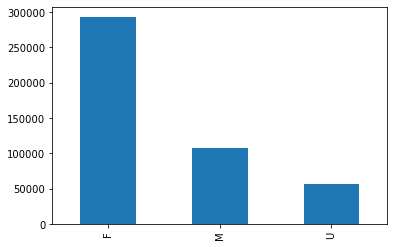

In [11]:
# Make a bar chart for the frequency distribution
users['gender'].value_counts().plot(kind = 'bar')

<Figure size 576x360 with 0 Axes>

Text(0.5, 1.0, 'Frequency Counts by Gender')

Text(0.5, 0, 'Gender')

Text(0, 0.5, 'Percentage (%)')

(0.0, 100.0)

Text(0.0, 13.53384007802352, '12.5%')

Text(1.0, 24.416677964915657, '23.4%')

Text(2.0, 65.04948195706083, '64.0%')

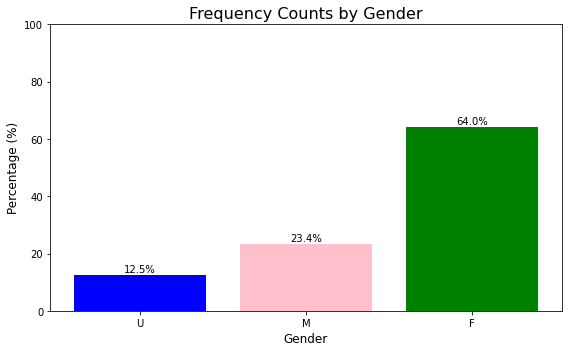

In [7]:
import matplotlib.pyplot as plt
# Make a bar chart for the frequency distribution
# Get the value counts
gender_counts = users['gender'].value_counts()

# Step 2: Calculate percentages
total = gender_counts.sum()
percentages = (gender_counts / total * 100).sort_values()  # Sort by percentage values

# Step 3: Create a bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(percentages.index, percentages.values, color=['blue', 'pink', 'green'])

# Add labels and title
plt.title('Frequency Counts by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.ylim(0, 100)  # Ensure the y-axis ranges from 0 to 100

# Add percentage labels above the bars
for bar, percentage in zip(bars, percentages.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, f'{percentage:.1f}%', ha='center', fontsize=10)

# Display the chart
plt.tight_layout()
plt.show()

26-35    183239
16-25    103306
36-45     81076
U         56457
46-55     18679
>=56      14517
<=15         24
Name: age, dtype: int64

<AxesSubplot:>

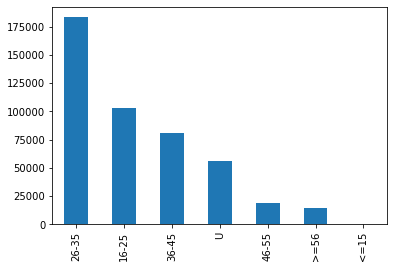

In [14]:
# Exercise: explore variable 'age'
users['age'].value_counts()
users['age'].value_counts().plot(kind = 'bar')

In [17]:
ageDis = users['age'].value_counts(sort = False)
type(ageDis)

pandas.core.series.Series

In [18]:
ageDis.index
# index of a Pandas Series is the category names

Index(['46-55', '<=15', '36-45', '>=56', '16-25', '26-35', 'U'], dtype='object')

In [18]:
ageDis.values
# values are the corresponding values

array([183239, 103306,  81076,  56457,  18679,  14517,     24],
      dtype=int64)

<BarContainer object of 7 artists>

Text(0.5, 0, 'Age')

Text(0, 0.5, 'Values')

Text(0.5, 1.0, 'Age Graph')

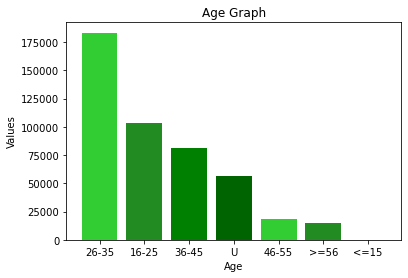

In [11]:
# Import the graph package matplotlib
import matplotlib.pyplot as plt
# Define a color palette
green_palette = ['limegreen', 'forestgreen', 'green', 'darkgreen']

# the graph
plt.bar(ageDis.index, ageDis.values, color=green_palette)


# Set labels and title
plt.xlabel('Age')
plt.ylabel('Values')
plt.title('Age Graph')

# Show the plot
plt.show()

5. Explore a single inteval variable

In [22]:
orders.columns

Index(['order_ID', 'user_ID', 'sku_ID', 'order_date', 'order_time', 'quantity',
       'type', 'promise', 'original_unit_price', 'final_unit_price',
       'direct_discount_per_unit', 'quantity_discount_per_unit',
       'bundle_discount_per_unit', 'coupon_discount_per_unit', 'gift_item',
       'dc_ori', 'dc_des'],
      dtype='object')

In [23]:
orders['original_unit_price'].describe()

count    549989.000000
mean        102.813542
std          95.035563
min           0.000000
25%          59.000000
50%          79.000000
75%         139.000000
max       12158.000000
Name: original_unit_price, dtype: float64

In [24]:
import numpy as np
# import numpy for math functions

In [27]:
np.var(orders['original_unit_price'])

9031.741770288845

In [ ]:
# Find quantile or percentile

In [9]:
# Find the records with the maximum price
# The max price is an outlier
orders[orders['original_unit_price'] == 12158]
orders[orders['original_unit_price'] > 500]
# We use the comparison to slice the original dataset

,order_ID,user_ID,sku_ID,order_date,order_time,quantity,type,promise,original_unit_price,final_unit_price,direct_discount_per_unit,quantity_discount_per_unit,bundle_discount_per_unit,coupon_discount_per_unit,gift_item,dc_ori,dc_des
52720,a63239c796,b695af3c92,1904d943c0,2018-03-03,2018-03-03 14:56:01.0,1,2,-,12158.0,12158.0,0.0,0.0,0.0,0.0,0,9,32


,order_ID,user_ID,sku_ID,order_date,order_time,quantity,type,promise,original_unit_price,final_unit_price,direct_discount_per_unit,quantity_discount_per_unit,bundle_discount_per_unit,coupon_discount_per_unit,gift_item,dc_ori,dc_des
22,d63faad1e8,1aa3eb1f80,6420ea9ac2,2018-03-01,2018-03-01 18:55:36.0,1,1,1,579.0,391.0,30.0,126.0,0.0,32.0,0,3,16
721,d6ce7b3b92,7a09f91ae2,6420ea9ac2,2018-03-01,2018-03-01 09:25:23.0,1,1,1,579.0,415.0,30.0,134.0,0.0,0.0,0,20,20
1175,749e71e066,3dbc52c012,6420ea9ac2,2018-03-01,2018-03-01 09:41:54.0,1,1,2,579.0,375.0,0.0,163.0,0.0,41.0,0,9,32
1205,9d463ca358,3c5083f6a9,6420ea9ac2,2018-03-01,2018-03-01 01:10:15.0,1,1,2,579.0,438.0,0.0,141.0,0.0,0.0,0,9,32
1411,5d47c2595a,f5b128fe3f,6420ea9ac2,2018-03-01,2018-03-01 06:15:07.0,1,1,3,579.0,392.0,30.0,129.0,0.0,28.0,0,9,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544518,3847186c2b,778fa608ba,6a0f1004bb,2018-03-31,2018-03-31 12:38:20.0,1,1,2,681.0,680.0,1.0,0.0,0.0,0.0,0,4,28
545752,075fec40c2,08246ccc7c,e49b988234,2018-03-31,2018-03-31 19:34:41.0,1,2,-,545.0,490.0,30.0,5.0,0.0,20.0,0,9,9
546817,b1895e6295,569c27a14a,6a0f1004bb,2018-03-31,2018-03-31 12:24:01.0,1,1,2,681.0,680.0,1.0,0.0,0.0,0.0,0,4,28
549011,5a585a244e,fcf8bef47d,699a9f2cad,2018-03-31,2018-03-31 08:47:19.0,1,2,-,868.0,868.0,0.0,0.0,0.0,0.0,0,10,11


(array([5.49971e+05, 5.00000e+00, 2.00000e+00, 1.00000e+00, 2.00000e+00,
        2.00000e+00, 2.00000e+00, 0.00000e+00, 1.00000e+00, 3.00000e+00]),
 array([    0. ,  1215.8,  2431.6,  3647.4,  4863.2,  6079. ,  7294.8,
         8510.6,  9726.4, 10942.2, 12158. ]),
 <BarContainer object of 10 artists>)

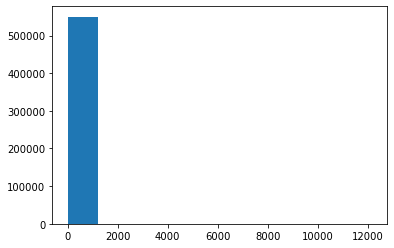

In [30]:
# A histogram to explore the distribution of the interval variable
# original price
plt.hist(orders['original_unit_price'])
# The results are strongly affected by the maximum value.

In [31]:
# delete the maximum record
orders = orders[orders['original_unit_price'] != 12158]

(array([5.49965e+05, 1.10000e+01, 2.00000e+00, 0.00000e+00, 1.00000e+00,
        2.00000e+00, 3.00000e+00, 1.00000e+00, 0.00000e+00, 3.00000e+00]),
 array([    0. ,  1104.6,  2209.2,  3313.8,  4418.4,  5523. ,  6627.6,
         7732.2,  8836.8,  9941.4, 11046. ]),
 <BarContainer object of 10 artists>)

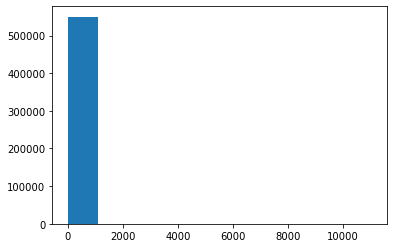

In [32]:
# The histogram again
plt.hist(orders['original_unit_price'])

In [32]:
orders['original_unit_price'].quantile(0.9999)

738.0

In [26]:
orders['original_unit_price'].mean()

102.81354199497737

In [27]:
orders['original_unit_price'].std()

95.03556277518332

In [28]:
up = orders['original_unit_price'].mean() + 3 * orders['original_unit_price'].std()
down = orders['original_unit_price'].mean() - 3 * orders['original_unit_price'].std()

In [29]:
print(up, down)

387.9202303205273 -182.2931463305726


In [33]:
normal_price = orders[orders['original_unit_price'] < 388]

(array([107222., 119175., 143434.,  69727.,  35921.,  16537.,  16975.,
         31718.,   5087.,   1087.]),
 array([  0. ,  38.5,  77. , 115.5, 154. , 192.5, 231. , 269.5, 308. ,
        346.5, 385. ]),
 <BarContainer object of 10 artists>)

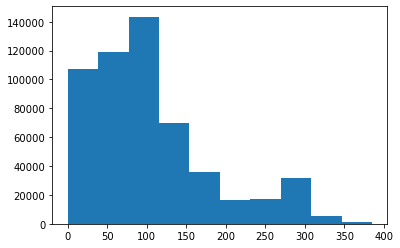

In [34]:
plt.hist(normal_price['original_unit_price'])

In [35]:
import numpy as np

In [ ]:
normal_price['log_original_price'] = np.log(normal_price['original_unit_price'] + 1)

(array([9.46030e+04, 1.40000e+01, 5.00000e+00, 1.52000e+02, 3.01700e+03,
        6.70200e+03, 6.54790e+04, 1.99949e+05, 1.18832e+05, 5.81300e+04]),
 array([0.        , 0.59558374, 1.19116747, 1.78675121, 2.38233495,
        2.97791868, 3.57350242, 4.16908616, 4.7646699 , 5.36025363,
        5.95583737]),
 <BarContainer object of 10 artists>)

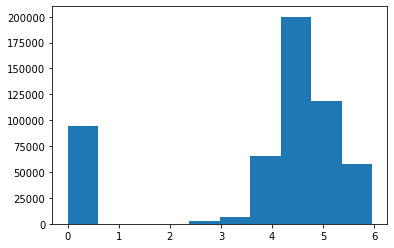

In [38]:
plt.hist(normal_price['log_original_price'])

5. Create a scatterplot

<Figure size 576x432 with 0 Axes>

<AxesSubplot:xlabel='original_unit_price', ylabel='final_unit_price'>

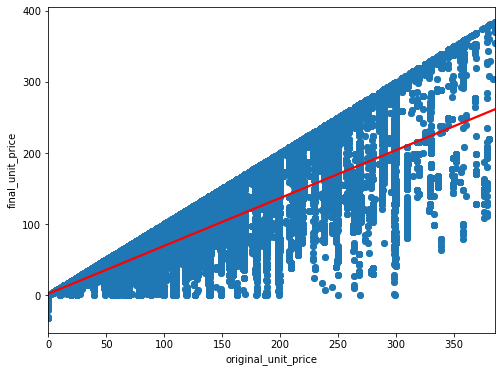

In [45]:
plt.figure(figsize=(8, 6))
plt.scatter(normal_price['original_unit_price'], normal_price['final_unit_price'],)
sns.regplot(x='original_unit_price', y='final_unit_price', data=normal_price, ci=None, line_kws={'color': 'red'})
import seaborn as sns

6. Create boxplots across categories

<AxesSubplot:title={'center':'original_unit_price'}, xlabel='type'>

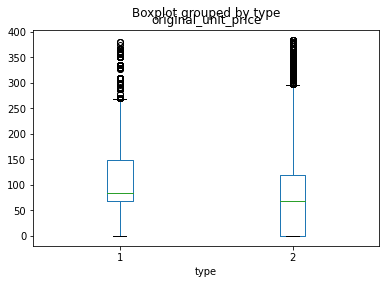

In [47]:
normal_price.boxplot(column='original_unit_price', by='type', grid=False)

<AxesSubplot:xlabel='type', ylabel='original_unit_price'>

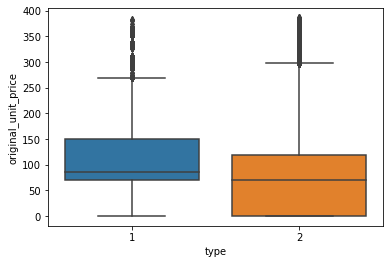

In [49]:
sns.boxplot(x = 'type', y = 'original_unit_price', data = normal_price)

<AxesSubplot:xlabel='type', ylabel='original_unit_price'>

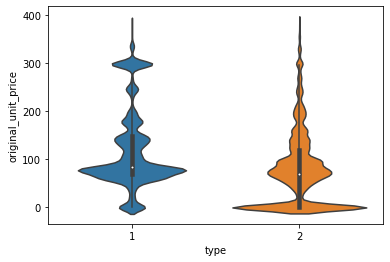

In [50]:
sns.violinplot(x = 'type', y = 'original_unit_price', data = normal_price)

In [51]:
normal_price['type'].unique()

array([2, 1], dtype=int64)